## Final Project Submission

Please fill out:
* Student name: Caleb Ochieng
* Student pace: Part time
* Scheduled project review date/time: 24th July, 2023 at 12:00 am
* Instructor name: Maryann Mwikali
* Blog post URL:


# PHASE 1 PROJECT

Microsoft has presented a hypothetical scenario where they express interest in establishing a movie studio. They have reached out to me for assistance in analyzing historical movie data to identify successful patterns and potential pitfalls. To gauge success, we will focus on two key metrics: profit and viewer ratings. Microsoft's primary goal is to ensure profitability for their new studio, leading me to base my recommendations on past elements that have proven profitable in movies. Additionally, we will place significant emphasis on positive audience reception, especially for the initial movie releases, recognizing the significant impact of making a favorable first impression on future viewer interest. As a result, I will also explore trends related to movies with both high and low ratings.

To conduct the analysis, three primary factors will be closely examined: <span style='color:green'>**ROI, genre, and star appeal (directors)**</span>. Concerning the budget, we will assess the optimal capital investment necessary to realistically generate substantial profits. The genre analysis will involve a comprehensive study of movies released in the US market to identify genres that have historically performed well both financially and critically.

The third crucial factor is star-power, where we will delve into the influence of recognizable actors and directors on a movie's financial success and ratings. Evaluating this aspect is particularly complex as it requires developing a metric that measures the level of "star-power" an individual possesses over time in their career. By exploring these factors, we aim to derive valuable insights that will effectively guide Microsoft's movie studio venture.

In [1]:
#Importing libraries necessary for the project
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pandasql as psql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import numpy as np
%matplotlib inline

# DATA INSPECTION

Inspect each movie dataset to see the info within

### **Box Office Mojo Dataset**

In [4]:
#Viewing the bom dataset
df = pd.read_csv('bom.movie_gross.csv')
#Viewing the first 10 entries
df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [5]:
#Looking at what is in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
# To view all duplicate rows
df_duplicates_rows = df[df.duplicated(keep=False)]

# To view all duplicate columns
df_duplicates_columns = df.T.duplicated()

# Display the duplicate rows
print("Duplicate Rows:")
print(df_duplicates_rows)

# Display the duplicate columns
print("Duplicate Columns:")
print(df_duplicates_columns[df_duplicates_columns].index.tolist()) 
#The index.tolist() method is used to convert the index of the duplicates_columns Series into a list, 
#which gives you the names of the duplicate columns.

Duplicate Rows:
Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []
Duplicate Columns:
[]


The <span style='color:blue'>**Box Office Mojo**</span> dataset comprises information such as movie title, studio, domestic and foreign gross, and the corresponding year of release. The dataset encompasses a total of 3387 movies.

The duplicated columns i.e title, studio, domestic_gross, foreign_gross and year are all necessary since we would expect some of the data in these columns to appear more than once.

This dataset does not contain any information that fits my primary factors of examination despite it having the domestic_gross and foreign_gross and therefore, I am unlikely to use it.

***

### **TheMovieDB Dataset**

In [7]:
#Viewing the dataset
db = pd.read_csv('tmdb.movies.csv')
#viewing the first 10 entries
db.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [8]:
#Looking at what is in the dataset
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [9]:
# To view all duplicate rows
db_duplicates_rows = db[db.duplicated(keep=False)]

# To view all duplicate columns
db_duplicates_columns = db.T.duplicated()

# Display the duplicate rows
print("Duplicate Rows:")
print(db_duplicates_rows)

# Display the duplicate columns
print("Duplicate Columns:")
print(db_duplicates_columns[db_duplicates_columns].index.tolist())
#The index.tolist() method is used to convert the index of the duplicates_columns Series into a list, 
#which gives you the names of the duplicate columns.

Duplicate Rows:
Empty DataFrame
Columns: [Unnamed: 0, genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count]
Index: []
Duplicate Columns:
[]


The <span style='color:blue'>TheMovieDB</span> dataset includes information such as genre, title, popularity, release date, vote average, and vote count. To gain a comprehensive understanding of these columns, I will need to look at them deeper. Specifically, I will explore the concept of popularity and determine its underlying factors. Additionally, I will investigate whether a higher vote count necessarily indicates that a movie was well received. By delving into these aspects, I aim to enhance my comprehension of the dataset and provide more insightful analysis.

All the duplicated columns seem essential except for the <span style='color:red'>'id'</span> column which is suppose to be unique for each item in the dataset rows. For the data in this dataset to satisfy the aim of this analysis, dropping the duplicates will be necessary.

In [10]:
#Viewing the duplicates in the 'id' column
db_duplicates = db[db.duplicated('id')]
db_duplicates 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2473,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2477,2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
2536,2536,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387
2673,2673,"[18, 10749]",46705,en,Blue Valentine,8.994,2010-12-29,Blue Valentine,6.9,1677
2717,2717,"[35, 18, 14, 27, 9648]",45649,en,Rubber,8.319,2010-09-01,Rubber,5.9,417
...,...,...,...,...,...,...,...,...,...,...
26481,26481,"[35, 18]",270805,en,Summer League,0.600,2013-03-18,Summer League,4.0,3
26485,26485,"[27, 53]",453259,en,Devils in the Darkness,0.600,2013-05-15,Devils in the Darkness,3.5,1
26504,26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1
26510,26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1


In [11]:
#Dropping the 'original_title' column because it contains the same information as the 'title' column. I decidec to drop 
# 'original_title column' because as much as it contained the same information as the 'title' column, it also had some titles
#written in different languages such as 'Счастье мое' for 'My Joy' and 'สวรรค์บ้านนา' for 'Agrarian Utopia'

db.drop(['original_title'], axis=1, inplace=True)

In [12]:
db.head()

,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186


In [13]:
#Dropping the duplicates in the 'id' column and viewing the new dataset info
db.drop_duplicates(subset='id').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         25497 non-null  int64  
 1   genre_ids          25497 non-null  object 
 2   id                 25497 non-null  int64  
 3   original_language  25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 1.9+ MB


The <span style='color:blue'>TheMovieDB</span> dataset is now free of unnecessary duplicates. As per our primary factors under examination, this dataset contains information on genre that could possibly assist in our research. Let's keep going!

***

### **Rotten Tomatoes Dataset**

In [14]:
#Rotten Tomatoes Information
rt = pd.read_csv('rt.movie_info.tsv', delimiter='\t')
#looking for the first five entries
rt

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [15]:
#Looking at what is in the dataset
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [16]:
# To view all duplicate rows
rt_duplicates_rows = rt[rt.duplicated(keep=False)]

# To view all duplicate columns
rt_duplicates_columns = rt.T.duplicated()

# Display the duplicate rows
print("Duplicate Rows:")
print(rt_duplicates_rows)

# Display the duplicate columns
print("Duplicate Columns:")
print(rt_duplicates_columns[rt_duplicates_columns].index.tolist())
#The index.tolist() method is used to convert the index of the duplicates_columns Series into a list, 
#which gives you the names of the duplicate columns.

Duplicate Rows:
Empty DataFrame
Columns: [id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio]
Index: []
Duplicate Columns:
[]


#### **Rotten Tomatoes reviews**

In [17]:
#Rotten Tomatoes reviews
rtr = pd.read_csv('rt.reviews.tsv', delimiter = '\t', encoding = 'latin1')
#Looking for the first 10 entries
rtr.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [18]:
rtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In the <span style='color:blue'>Rotten Tomatoes</span> dataset, both the movie info and reviews contain data in two spectrums of my primary factors i.e genre and budget. From close observation, the budget/currency has a lot of NaN values and because of that, I will not use this dataset.

***

### The Numbers Dataset

In [19]:
#Viewing the bom dataset
tn = pd.read_csv('tn.movie_budgets.csv')
#Viewing the first 10 entries
tn.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [20]:
#Looking at what is in the dataset
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [21]:
#The values for production_budget, domestic_gross and worldwide_gross are strings convert to floats.
# List of columns to process
columns_to_process = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Apply the lambda function to each column
tn[columns_to_process] = tn[columns_to_process].apply(lambda x: x.str.replace('$','').str.replace(',','').astype('float'))

# Print the updated DataFrame
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


I will use the production_budget and worldwide_gross to create profit and roi columns which will be essential in our analysis

In [22]:
#Take the converted financial columns and find the profit (worldwide_gross - production_budget) as well as the return on investment (roi).
tn['profit'] = tn['worldwide_gross'] - tn['production_budget']
tn['roi'] = (tn['profit']/tn['production_budget']) * 100
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,315.369636
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-100.000000
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.344950e+05,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-73.240000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-100.000000


In [23]:
#Checking what the dataset now looks like
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   profit             5782 non-null   float64
 7   roi                5782 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 361.5+ KB


<span style='color:blue'>The Numbers</span> dataset is rich in information I need for my budget factor. It will then be crucial to use this dataset in my analysis.

***

### IMDb

In [24]:
#Viewing the IMDb datasets
persons = pd.read_csv('name.basics.csv')
crew = pd.read_csv('title.crew.csv')
basics = pd.read_csv('title.basics.csv')

In [25]:
persons

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [26]:
persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [27]:
crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [28]:
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [29]:
basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [30]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Just from an overview of the <span style='color:blue'>IMDb</span> dataset, it is clear that it contains a good number of my primary factors i.e <span style='color:green'>genres</span> and <span style='color:green'>directors</span> (star appeal). Combining these datasets with <span style='color:blue'>The Numbers</span> dataset which contains the <span style='color:green'>budget</span> factor would give me a great dataset to work with. This therefore means that I will use the IMDb dataset in my analysis

***

# JOINING AND CLEANING DATASETS

By executing an SQL query on the 'persons' and 'crew' DataFrames, we can merge the movie code with the actual names of directors to create a new DataFrame named 'director'.

In [31]:
x = """
SELECT c.tconst, p.primary_name AS director_name
FROM crew AS c
JOIN persons AS p
    ON c.directors = p.nconst
"""
director = pysqldf(x)
director

,tconst,director_name
0,tt0285252,Tony Vitale
1,tt0462036,Bill Haley
2,tt0835418,Jay Chandrasekhar
3,tt0879859,Eric Manchester
4,tt0996958,Tara Cardinal
...,...,...
124684,tt8998302,Daryl Boman
124685,tt8999892,C. Damon Adcock
124686,tt8999974,Daysi Burbano
124687,tt9001390,Bernard Lessa


Joining <span style='color:blue'>IMDb</span> dataset (basics and director) with <span style='color:blue'>The Numbers</span> dataset. Keeping in mind that my primary factors of ananysis are budget, genre and star appeal, my focus from these datasets will be movie, production_budget, worldwide_gross, profit, roi, genres, tconst and director_name.

In [32]:
y = """
SELECT A.movie, A.release_date, AB.genres, AB.tconst, D.director_name, A.production_budget, A.worldwide_gross, A.profit, A.roi  
FROM tn AS A
JOIN basics AS AB
    ON A.movie = AB.primary_title
JOIN director AS D
    ON AB.tconst = D.tconst
"""
movie_dataset = pysqldf(y)
movie_dataset

,movie,release_date,genres,tconst,director_name,production_budget,worldwide_gross,profit,roi
0,Avatar,"Dec 18, 2009",Horror,tt1775309,Atsushi Wada,425000000.0,2.776345e+09,2.351345e+09,553.257713
1,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","Action,Adventure,Fantasy",tt1298650,Rob Marshall,410600000.0,1.045664e+09,6.350639e+08,154.667286
2,Dark Phoenix,"Jun 7, 2019","Action,Adventure,Sci-Fi",tt6565702,Simon Kinberg,350000000.0,1.497624e+08,-2.002376e+08,-57.210757
3,Avengers: Age of Ultron,"May 1, 2015","Action,Adventure,Sci-Fi",tt2395427,Joss Whedon,330600000.0,1.403014e+09,1.072414e+09,324.384139
4,Justice League,"Nov 17, 2017","Action,Adventure,Fantasy",tt0974015,Zack Snyder,300000000.0,6.559452e+08,3.559452e+08,118.648403
...,...,...,...,...,...,...,...,...,...
3380,Clean,"Apr 28, 2006","Comedy,Drama,Horror",tt6619196,Graham Wright,10000.0,1.387110e+05,1.287110e+05,1287.110000
3381,Cure,"Jul 6, 2001",Drama,tt1872026,Bill Yip,10000.0,9.459600e+04,8.459600e+04,845.960000
3382,Cure,"Jul 6, 2001",None,tt5936960,Ifigeneia Dimitriou,10000.0,9.459600e+04,8.459600e+04,845.960000
3383,Newlyweds,"Jan 13, 2012","Comedy,Drama",tt1880418,Edward Burns,9000.0,4.584000e+03,-4.416000e+03,-49.066667


In [33]:
# Convert 'release_date' to datetime format
movie_dataset['release_date'] = pd.to_datetime(movie_dataset['release_date'], format='%b %d, %Y')

# Extract month names from 'release_date'. The %B format code in dt.strftime() converts the month numbers to full month names.
movie_dataset['release_month'] = movie_dataset['release_date'].dt.strftime('%B')

# Drop the original 'release_date' column if not needed anymore
movie_dataset.drop('release_date', axis=1, inplace=True)

movie_dataset

,movie,genres,tconst,director_name,production_budget,worldwide_gross,profit,roi,release_month
0,Avatar,Horror,tt1775309,Atsushi Wada,425000000.0,2.776345e+09,2.351345e+09,553.257713,December
1,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",tt1298650,Rob Marshall,410600000.0,1.045664e+09,6.350639e+08,154.667286,May
2,Dark Phoenix,"Action,Adventure,Sci-Fi",tt6565702,Simon Kinberg,350000000.0,1.497624e+08,-2.002376e+08,-57.210757,June
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",tt2395427,Joss Whedon,330600000.0,1.403014e+09,1.072414e+09,324.384139,May
4,Justice League,"Action,Adventure,Fantasy",tt0974015,Zack Snyder,300000000.0,6.559452e+08,3.559452e+08,118.648403,November
...,...,...,...,...,...,...,...,...,...
3380,Clean,"Comedy,Drama,Horror",tt6619196,Graham Wright,10000.0,1.387110e+05,1.287110e+05,1287.110000,April
3381,Cure,Drama,tt1872026,Bill Yip,10000.0,9.459600e+04,8.459600e+04,845.960000,July
3382,Cure,None,tt5936960,Ifigeneia Dimitriou,10000.0,9.459600e+04,8.459600e+04,845.960000,July
3383,Newlyweds,"Comedy,Drama",tt1880418,Edward Burns,9000.0,4.584000e+03,-4.416000e+03,-49.066667,January


In [34]:
#Looking at what is in the dataset
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3385 non-null   object 
 1   genres             3352 non-null   object 
 2   tconst             3385 non-null   object 
 3   director_name      3385 non-null   object 
 4   production_budget  3385 non-null   float64
 5   worldwide_gross    3385 non-null   float64
 6   profit             3385 non-null   float64
 7   roi                3385 non-null   float64
 8   release_month      3385 non-null   object 
dtypes: float64(4), object(5)
memory usage: 238.1+ KB


In [35]:
#Looking for sum of duplicates in the dataset
movie_dataset[movie_dataset.duplicated(keep=False)].sum()

movie                0.0
genres               0.0
tconst               0.0
director_name        0.0
production_budget    0.0
worldwide_gross      0.0
profit               0.0
roi                  0.0
release_month        0.0
dtype: float64

In [36]:
#Dropping null values from the data.
movie_dataset = movie_dataset.dropna()

In [37]:
#Check Unique Values: For numeric columns, there should not be a single unique value
columns_to_describe = ['production_budget','worldwide_gross','profit','roi']

movie_dataset[columns_to_describe].nunique()

production_budget     327
worldwide_gross      1992
profit               2073
roi                  1991
dtype: int64

In [39]:
# List of columns you want to convert to float64
columns_to_convert = ['production_budget', 'worldwide_gross', 'profit', 'roi']

# Use .loc to convert the selected columns to float64
movie_dataset.loc[:, columns_to_convert] = movie_dataset.loc[:, columns_to_convert].astype('float64')

In [40]:
#Viewing the modified dataset
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3352 entries, 0 to 3384
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3352 non-null   object 
 1   genres             3352 non-null   object 
 2   tconst             3352 non-null   object 
 3   director_name      3352 non-null   object 
 4   production_budget  3352 non-null   float64
 5   worldwide_gross    3352 non-null   float64
 6   profit             3352 non-null   float64
 7   roi                3352 non-null   float64
 8   release_month      3352 non-null   object 
dtypes: float64(4), object(5)
memory usage: 261.9+ KB


In [41]:
# Sort the DataFrame in descending order based on multiple columns
sorted_movie_dataset = movie_dataset.sort_values(
    by=['production_budget', 'worldwide_gross', 'profit', 'roi'],
    ascending=False)

sorted_movie_dataset

,movie,genres,tconst,director_name,production_budget,worldwide_gross,profit,roi,release_month
0,Avatar,Horror,tt1775309,Atsushi Wada,425000000.0,2.776345e+09,2.351345e+09,553.257713,December
1,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",tt1298650,Rob Marshall,410600000.0,1.045664e+09,6.350639e+08,154.667286,May
2,Dark Phoenix,"Action,Adventure,Sci-Fi",tt6565702,Simon Kinberg,350000000.0,1.497624e+08,-2.002376e+08,-57.210757,June
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",tt2395427,Joss Whedon,330600000.0,1.403014e+09,1.072414e+09,324.384139,May
5,Spectre,"Action,Adventure,Thriller",tt2379713,Sam Mendes,300000000.0,8.796209e+08,5.796209e+08,193.206974,November
...,...,...,...,...,...,...,...,...,...
3379,Stories of Our Lives,Drama,tt3973612,Jim Chuchu,15000.0,0.000000e+00,-1.500000e+04,-100.000000,December
3380,Clean,"Comedy,Drama,Horror",tt6619196,Graham Wright,10000.0,1.387110e+05,1.287110e+05,1287.110000,April
3381,Cure,Drama,tt1872026,Bill Yip,10000.0,9.459600e+04,8.459600e+04,845.960000,July
3383,Newlyweds,"Comedy,Drama",tt1880418,Edward Burns,9000.0,4.584000e+03,-4.416000e+03,-49.066667,January


In [42]:
# Use .describe() to get summary statistics for the Dataset
sorted_movie_dataset.describe()

,production_budget,worldwide_gross,profit,roi
count,3.352000e+03,3.352000e+03,3.352000e+03,3352.000000
mean,3.207167e+07,8.904766e+07,5.697599e+07,323.893575
std,4.423235e+07,1.788773e+08,1.478931e+08,1418.959482
min,7.000000e+03,0.000000e+00,-2.002376e+08,-100.000000
25%,4.575000e+06,1.974052e+06,-3.291346e+06,-72.224562
50%,1.600000e+07,2.467392e+07,5.489826e+06,43.675815
75%,4.000000e+07,9.066472e+07,5.397848e+07,244.402525
max,4.250000e+08,2.776345e+09,2.351345e+09,31135.431235


**Count**: The count row shows the number of non-missing values in each column. It tells you how many valid data points are present in each column. For example, there are 3352 valid data points in the 'production_budget', 'worldwide_gross', 'profit', and 'roi' columns.

**Mean**: The mean row shows the average value for each column. It is calculated by summing all the values in the column and dividing by the count of non-missing values. For example, the average 'production_budget' is approximately 32.07 million, 'worldwide_gross' is approximately 89.05 million, 'profit' is approximately 56.98 million, and 'roi' is approximately 323.89.

**Std**: The std (standard deviation) row shows the measure of the amount of variation or dispersion in each column's data points. It indicates how spread out the values are around the mean. A larger standard deviation implies more variability. For example, the standard deviation for 'production_budget' is approximately 44.23 million, 'worldwide_gross' is approximately 178.88 million, 'profit' is approximately 147.89 million, and 'roi' is approximately 1418.96.

**min**: The min (minimum) row shows the smallest value in each column. For example, the smallest 'production_budget' is 7000, 'worldwide_gross' is 0, 'profit' is -200.24 million, and 'roi' is -100. These values represent the lower bound of the data distribution.

**max**: The max (maximum) row shows the largest value in each column. For example, the maximum 'production_budget' is 425 million, 'worldwide_gross' is 2.78 billion, 'profit' is 2.35 billion, and 'roi' is 31135.43.

In [44]:
# Define the order of months
month_order = ['December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

# Convert 'release_month' to a categorical data type with the defined month order
sorted_movie_dataset['release_month'] = pd.Categorical(sorted_movie_dataset['release_month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'release_month' column in ascending order
movie_dataset_month_sorted = sorted_movie_dataset.sort_values(by='release_month')

movie_dataset_month_sorted

,movie,genres,tconst,director_name,production_budget,worldwide_gross,profit,roi,release_month
0,Avatar,Horror,tt1775309,Atsushi Wada,425000000.0,2.776345e+09,2.351345e+09,553.257713,December
1433,La La Land,"Comedy,Drama,Music",tt3783958,Damien Chazelle,20000000.0,4.263512e+08,4.063512e+08,2031.755815,December
1541,Admiral,"Action,Adventure,Biography",tt2544766,Roel Reiné,20000000.0,3.858505e+07,1.858505e+07,92.925235,December
1482,On the Basis of Sex,"Biography,Drama",tt4669788,Mimi Leder,20000000.0,3.807338e+07,1.807338e+07,90.366885,December
1488,Psycho,Thriller,tt3000390,Kishore Bhargav,20000000.0,3.722622e+07,1.722622e+07,86.131090,December
...,...,...,...,...,...,...,...,...,...
176,Megamind,"Action,Animation,Comedy",tt1001526,Tom McGrath,130000000.0,3.218872e+08,1.918872e+08,147.605545,November
65,Hugo,Documentary,tt7496196,Wojciech Klimala,180000000.0,1.800478e+08,4.778400e+04,0.026547,November
2164,Melancholia,"Drama,Sci-Fi",tt1527186,Lars von Trier,9400000.0,2.181730e+07,1.241730e+07,132.098915,November
545,Midway,"Action,Drama,History",tt6924650,Roland Emmerich,59500000.0,0.000000e+00,-5.950000e+07,-100.000000,November


## **VISUALIZING THE MOVIE DATASET MONTH SORTED**

Now that I have a clean dataset, it is time to view how my primary factors of analysis relate with each other. In this section, my key deliverables will be:
1. Months when most genres are released.
2. Number of movies in each genre.
3. Directors of the most released genres.
4. ROI per month.
5. Genres with the highest ROI.
6. Directors with the highest ROI.

**1. Months when most genres are released**

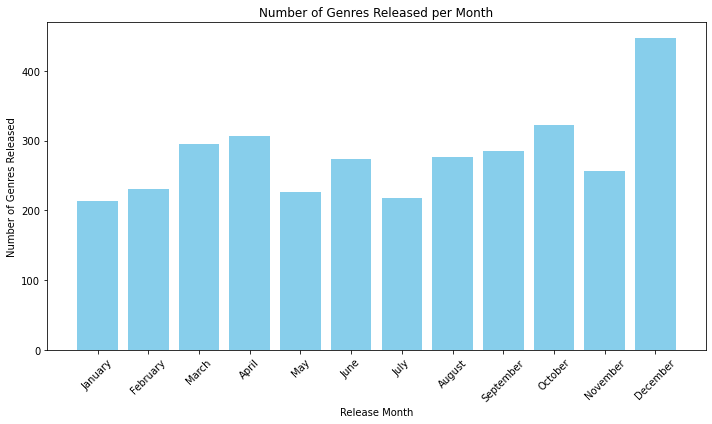

In [45]:
data50 = movie_dataset_month_sorted.loc[:,['release_month','genres']]
# Create the DataFrame
movie_dataset = pd.DataFrame(data50)

# Convert the 'release_month' column to a numerical format
months_to_numbers = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

movie_dataset['release_month'] = movie_dataset['release_month'].map(months_to_numbers)

# Count the number of genres released per month
genres_per_month = movie_dataset.groupby('release_month')['genres'].count()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(genres_per_month.index, genres_per_month.values, color='skyblue')

# Add labels and title
plt.xlabel('Release Month')
plt.ylabel('Number of Genres Released')
plt.title('Number of Genres Released per Month')

# Show the plot
plt.xticks(list(months_to_numbers.values()), list(months_to_numbers.keys()), rotation=45)  
plt.tight_layout()
plt.show()


From the above bar graph, it is clear that months with the highes movie releases are December, October, April, March, June, August and November respectively.

**2. Number of movies in each genre**

I will visualize the number of movie genres in the dataset

The above visualizations helped me paint a picture of the most released genres. 

Graph named 'Number of exploded genre released' shows that when movies released are of a single genre, those that are mostly released are drama, comedy, action and thriller.

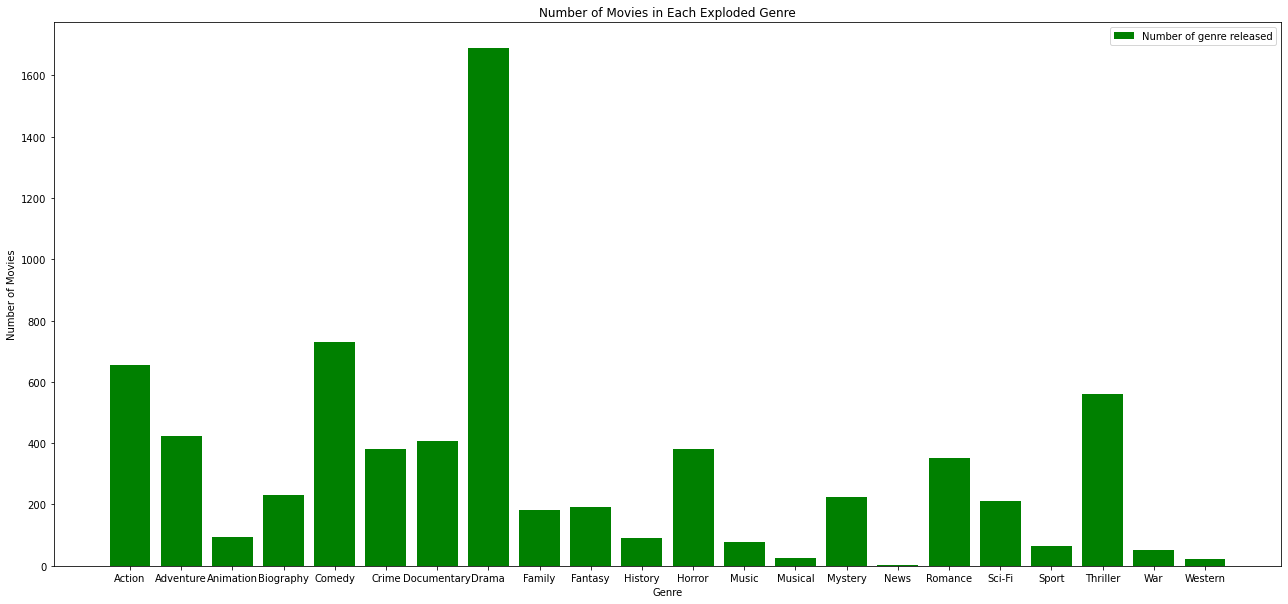

In [46]:
data = movie_dataset_month_sorted.loc[:, ['movie','genres']]

movie_dataset = pd.DataFrame(data)

# Split the genres column and convert it to a list of genres
movie_dataset['genres'] = movie_dataset['genres'].str.split(',')

# Explode the genres list to get a separate row for each genre
movie_dataset_exploded = movie_dataset.explode('genres')

# Group the dataset by genre and count the number of movies in each genre
genre_counts = movie_dataset_exploded.groupby('genres')['movie'].count()

# Create a bar plot for the number of movies in each genre
plt.figure(figsize=(22, 10))
plt.bar(genre_counts.index, genre_counts.values, color='green', label= 'Number of genre released')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Exploded Genre')

plt.legend()

# Show the plot
plt.show()


**3. Directors of the most released genres**

Viewing top directors in the Sorted Movie Dataset

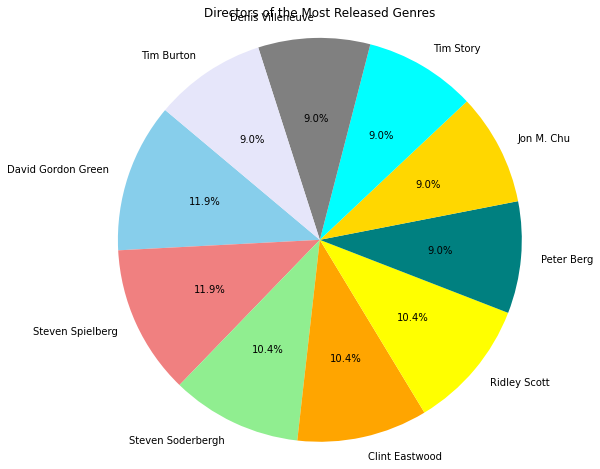

In [47]:
data1 = movie_dataset_month_sorted.loc[:, ['director_name','movie']]

movie_dataset = pd.DataFrame(data1)

# Group the dataset by director_name and count the number of movies directed by each director
director_counts = movie_dataset.groupby('director_name')['movie'].count() 

# Sort directors based on the count of movies they directed in descending order
director_counts = director_counts.sort_values(ascending=False)

# Select the top 5 directors with the highest counts
top_directors = director_counts.head(10)

# Create a pie chart for the distribution of movies among the top directors
plt.figure(figsize=(8, 8))
plt.pie(top_directors.values, labels=top_directors.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'yellow','teal','gold','cyan','gray','lavender'])

# Add title
plt.title('Directors of the Most Released Genres')

# Show the plot
plt.axis('equal')
plt.show()


From the obove pie chart, I can conclude that the movie production industry is dominated by few directors. These directors produce the most released genres we earlier identified.

**4. ROI per month**

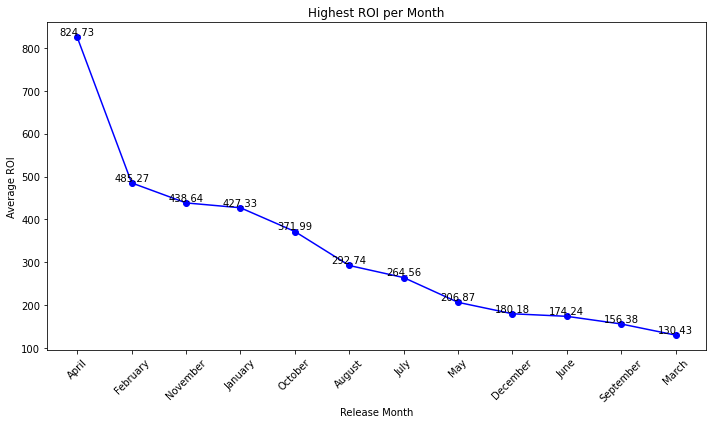

In [79]:
# Calculate the average ROI for each month
month_avg_roi = movie_dataset_month_sorted.groupby('release_month')['roi'].mean().reset_index()

# Sort the months based on average ROI in descending order
month_avg_roi = month_avg_roi.sort_values(by='roi', ascending=False)

# Plot the line graph for highest ROI per month
plt.figure(figsize=(10, 6))
plt.plot(month_avg_roi['release_month'], month_avg_roi['roi'], marker='o', color='b')

# Add labels and title
plt.xlabel('Release Month')
plt.ylabel('Average ROI')
plt.title('Highest ROI per Month')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Annotate each data point with the ROI value
for i, roi in enumerate(month_avg_roi['roi']):
    plt.text(month_avg_roi['release_month'].iloc[i], roi, f'{roi:.2f}', ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()


April had the highest roi followed by July, December, May, November, June and January respectively. Having a closer look at the month of April, I see that despite not being the month with the highest genre releases, with the genre released in that month being a combination of Comedy, Drama and Horror with its director being Graham Wright.

**5. ROI per genre**

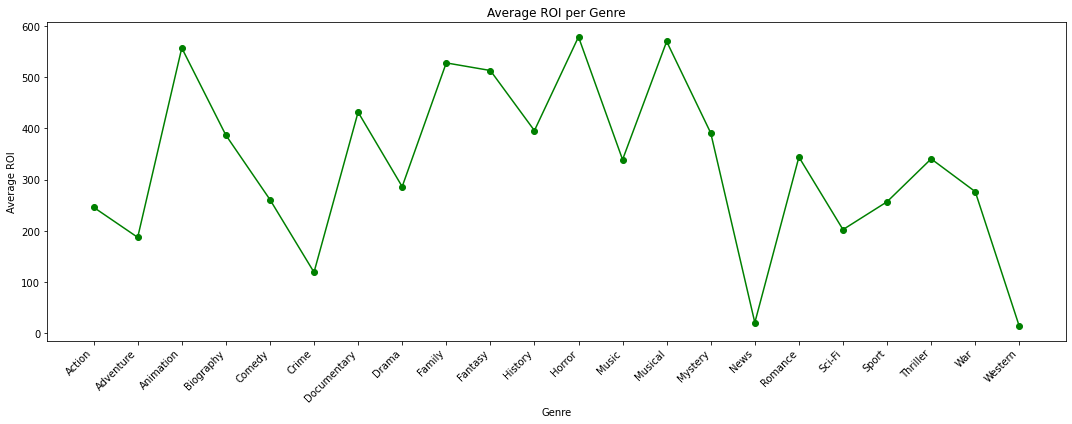

In [54]:
data4 = movie_dataset_month_sorted.loc[:, ['genres','roi']]

movie_dataset = pd.DataFrame(data4)

# Split the genres column and convert it to a list of genres
movie_dataset['genres'] = movie_dataset['genres'].str.split(',')

# Explode the genres list to get a separate row for each genre
movie_dataset_exploded = movie_dataset.explode('genres')

# Group the dataset by genre and calculate the average ROI for each genre
genre_avg_roi = movie_dataset_exploded.groupby('genres')['roi'].mean()

# Create the line graph for ROI per genre
plt.figure(figsize=(15, 6))
plt.plot(genre_avg_roi.index, genre_avg_roi.values, marker='o', linestyle='-', color='green')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.title('Average ROI per Genre')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


The above line graph reveals that the some of the genres with the highest roi are horror, musical, animation and family. I find this quite strange given that these are not the same genres I find under mostly released genres per month.

*ROI for ungrouped genres*

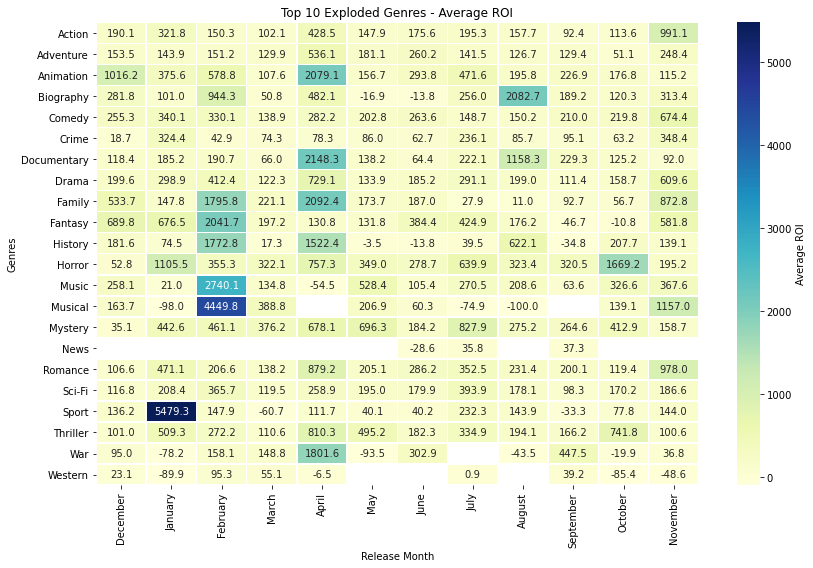

In [76]:
# Split the genres column and create a new row for each genre
genre_split = movie_dataset_month_sorted['genres'].str.split(',', expand=True).stack()
genre_split.index = genre_split.index.droplevel(-1)

# Merge the expanded genres with the original dataset
movie_dataset_exploded = movie_dataset_month_sorted.drop(columns='genres').join(genre_split.rename('genre'))

# Calculate the average ROI for each genre
genre_avg_roi = movie_dataset_exploded.groupby('genre')['roi'].mean().reset_index()

# Sort the genres based on average ROI in descending order
genre_avg_roi = genre_avg_roi.sort_values(by='roi', ascending=False)

# Select the top 10 genres with the highest average ROI
top_genres = genre_avg_roi.head(22)

# Filter the movie dataset to include only the movies with the top 10 genres
movies_top_genres = movie_dataset_exploded[movie_dataset_exploded['genre'].isin(top_genres['genre'])]

# Create a pivot table with genres as rows, months as columns, and average ROI as values
pivot_table_roi = movies_top_genres.pivot_table(index='genre', columns='release_month', values='roi')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_roi, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Average ROI'})

# Add labels and title
plt.xlabel('Release Month')
plt.ylabel('Genres')
plt.title('Top 10 Exploded Genres - Average ROI')

plt.tight_layout()
plt.show()


*ROI for grouped genres*

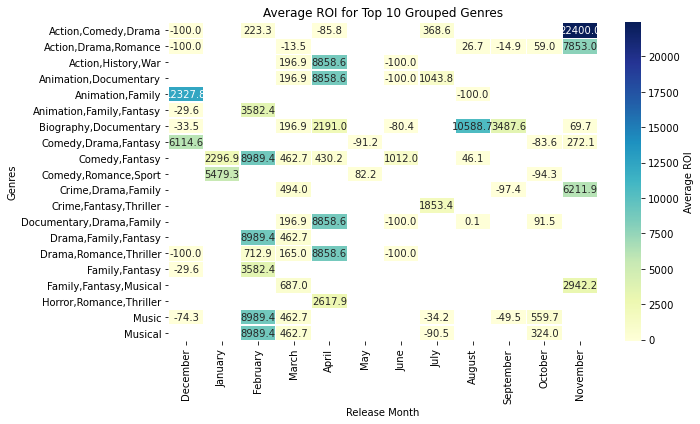

In [75]:
data25 = movie_dataset_month_sorted.loc[:,['genres','roi']]
# Create the DataFrame
movie_dataset = pd.DataFrame(data25)

# Calculate the average ROI for each genre
genre_avg_roi = movie_dataset_month_sorted.groupby('genres')['roi'].mean().reset_index()

# Sort genres based on average ROI in descending order and get the top 10 genres
top_genres = genre_avg_roi.sort_values(by='roi', ascending=False).head(20)

# Filter the dataset to include only the top 10 genres with the highest ROI
top_genres_data = movie_dataset_month_sorted[movie_dataset_month_sorted['genres'].isin(top_genres['genres'])]

# Create a pivot table with genres as rows, months as columns, and average ROI as values
pivot_table_roi = top_genres_data.pivot_table(index='genres', columns='release_month', values='roi')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_roi, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Average ROI'})

# Add labels and title
plt.xlabel('Release Month')
plt.ylabel('Genres')
plt.title('Average ROI for Top 10 Grouped Genres')

plt.tight_layout()
plt.show()


The above heat map shows that when movies released have combined genres, the ROI is much higher. An in stance is where a combination of action, comedy and drama have the highest ROI while when produced by themselves, the ROI is much lower as shown in the ROI for ungrouped genres heat map.

**6. Directors with the highest ROI**

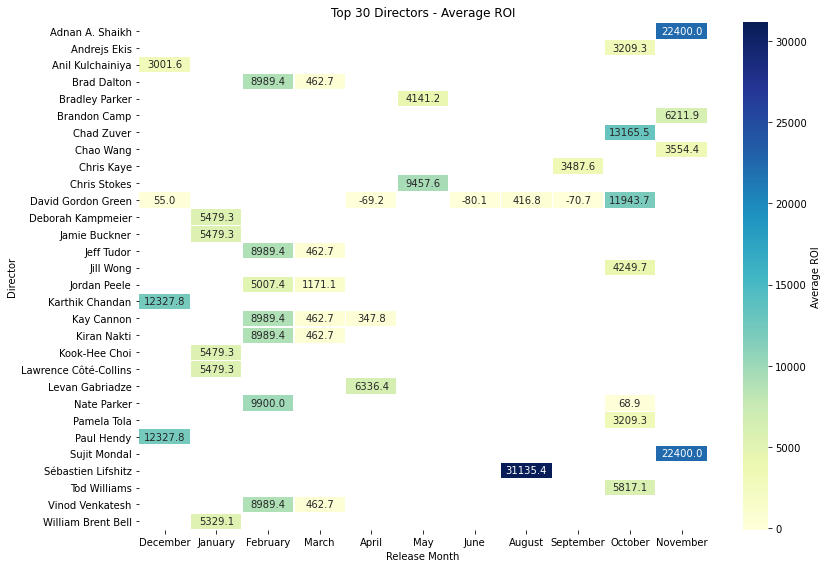

In [57]:
# Calculate the average ROI for each director
director_avg_roi = movie_dataset_month_sorted.groupby('director_name')['roi'].mean().reset_index()

# Sort the directors based on average ROI in descending order
director_avg_roi = director_avg_roi.sort_values(by='roi', ascending=False)

# Select the top 30 directors with the highest average ROI
top_directors = director_avg_roi.head(30)

# Filter the movie dataset to include only the movies directed by the top 30 directors
movies_top_directors = movie_dataset_month_sorted[movie_dataset_month_sorted['director_name'].isin(top_directors['director_name'])]

# Create a pivot table with director names as rows, months as columns, and average ROI as values
pivot_table_roi = movies_top_directors.pivot_table(index='director_name', columns='release_month', values='roi')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_roi, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Average ROI'})

# Add labels and title
plt.xlabel('Release Month')
plt.ylabel('Director')
plt.title('Top 30 Directors - Average ROI')

plt.tight_layout()
plt.show()


In [77]:
# Group the dataset by director_name and calculate the average ROI and the list of movie genres for each director
director_stats = movie_dataset_month_sorted.groupby('director_name').agg({'roi': 'mean', 'genres': lambda x: ', '.join(x), 'release_month': lambda x: ', '.join(x)}).reset_index()

# Sort directors based on average ROI in descending order
director_stats = director_stats.sort_values(by='roi', ascending=False)

# Get the top directors with the highest ROI
top_directors = director_stats.head(30) 

# Display the list of top directors along with their ROI and the movie genres they directed
top_directors


,director_name,roi,genres,release_month
2292,Sébastien Lifshitz,31135.431235,"Biography,Documentary",August
2276,Sujit Mondal,22400.000000,"Action,Comedy,Drama",November
24,Adnan A. Shaikh,22400.000000,"Action,Drama,Romance",November
349,Chad Zuver,13165.547928,"Horror, Horror","October, October"
1251,Karthik Chandan,12327.788038,"Animation,Family",December
1802,Paul Hendy,12327.788038,"Comedy,Drama,Fantasy",December
388,Chris Stokes,9457.600000,Thriller,May
1369,Levan Gabriadze,6336.419800,"Horror,Mystery,Thriller",April
288,Brandon Camp,6211.912000,"Crime,Drama,Family",November
2366,Tod Williams,5817.067733,Horror,October


The above output reveals that the top 30 directors with the highest ROI in our dataset directed movies with genres as follows Biography, Documentary, Action, Comedy, Drama, Romance, Horror, Animation, Family, Sport, Fantasy and Musical. Their main release months are January, February, March, October, November and December.

***

## CONCLUSION

This analysis informs that for Microsoft to establish a successful movie studio, the following should be its key deliverables:
1. In creating movies with high ROI, it is best to focus on those with multiple genres. Top 5 combined genres with highest ROI being 'Action, Comedy, Drama', 'Biography, Documentary', 'Action, Drama, Romance', 'Animation, Family, Fantasy' and 'comedy, fantasy'. If the movie studio is to release movies with one genre, then the following top 5 would be recommended; Horror, Musical, Animation, Documentary and Family.
2. Top months to release movies are December, October, April, March, June, August, November and January. Further research has shown that these months fall in the winter and holiday season.
3. The star appeal suggest that having some directors who have had experience in the successful genres can increase chances of the movie's success. 